3)	Probability and uncertainty. (Ideally use a jupyter notebook). Note: ***dark red bold*** keywords are probabilistic or statistical term.

a)	Airlines are commonly known to utilize overbooking to earn extra profits or avoid losses over the fact that not all passengers will show up on boarding day. We will use a simple scenario here to demonstrate how airlines might do so.
* i)	The passenger travel in this scenario is assumed to be alone. Factors such as weather, festival season, time of the flight and other external factors are assumed to not affect our model.
* ii)	Historically passenger showed up rate is 80%
* iii)	The number of tickets to be sold without overbooking is 200, and the cost of a ticket is \\$120.
* iv)	The management of the airline is planning to overbook the seats by additional 50 tickets to achieve full capacity and avoid losses. Hence the total ticket to be sold is 250. (0.8x = 200, hence x = 250).
* v)	However the risk is if more than 200 passengers showed on boarding day, the airline must compensate each bumped passenger by \\$300.

b)	The revenue without overbook is \\$24,000 (\\$120\*200), while for best case scenario where 250 tickets are sold and 50 no show passengers is \\$30,000 (\\$120\*250).  Show the revenue calculation for worst case scenario.

c)	Using the python library from **matplotlib/seaborn** and **scipy.stats** write codes to plot the ***probability mass function (pmf)*** for the above scenario. Hint: Your diagram should closely resemble the diagram below.


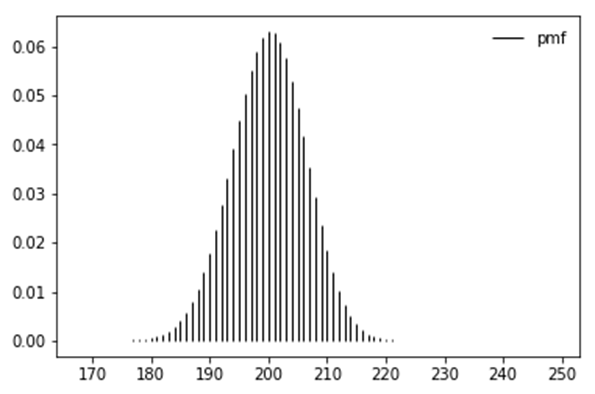

d)	What is the probability of passengers showed up for:
* i)	200
* ii)	250

e)	What is the ***expected revenue*** of 250 tickets sold?

f)	Is 250 overbook tickets the most optimal number? Run a simulation of ***expected revenue*** from 201 to 260 tickets sold.

g)	Plot the number of tickets sold against expected revenue and draw a vertical line to mark the optimal number of tickets sold.

h)	By using the optimal number of tickets from **(f)** and with the shown up rate of 80%, generate 10,000 random numbers to simulate the possible number of passengers that show up . (hint : .rvs(n, p, size=10000))

i)	What is the min, max and 95% percentile of the number of passengers showing up from **(g)**?

j)	What if the passenger isn’t traveling alone, describe how it affects the model.

k)	For the solutions, you **should** as much as possible minimize the usage of loop and instead be replaced with matrix computation (i.e numpy multiplication). 

l)	From your observation or research on Involve Asia, how do you think this scenario relates to the business model?


# ANSWER
---

b)	The revenue without overbook is \\$24,000 (\\$120\*200), while for best case scenario where 250 tickets are sold and 50 no show passengers is \\$30,000 (\\$120\*250).  Show the revenue calculation for worst case scenario.
___

Revenue calculation for worst case scenario (250 tickets sold and 250 passengers showed up):

Sales from 250 tickets sold = \\$30,000

Compensation for 50 bumped passengers = \\$15,000 (\\$300\*50)

Revenue for worst case scenario = (Sales from 250 tickets sold) - (Compensation for 50 bumped passengers) = *\\$15,000 (\\$30,000 - \\$15,000)

---
c)	Using the python library from **matplotlib/seaborn** and **scipy.stats** write codes to plot the ***probability mass function (pmf)*** for the above scenario. Hint: Your diagram should closely resemble the diagram below.
___



The probability mass function for binomial problem is:

$ P(k) = \binom{n}{k} p^{k}(1-p)^{n-k} $

for:

$k \in \{0,1,2,3..., n\}, 0 \le p \le 1 $

where:

$ P(k) = $ binomial probability

$ k = $ number of times for a specific outcome within n trials = number of passenger who show up

$ n = $ number of trials = number of passengers

$ p = $ probability of success for a single trial

$ q = 1 - p$ probability of failure in a single trial

Historically, passenger show up rate is 80%

p = 0.80



Text(0.5, 1.0, 'Probability Mass Function (PMF)')

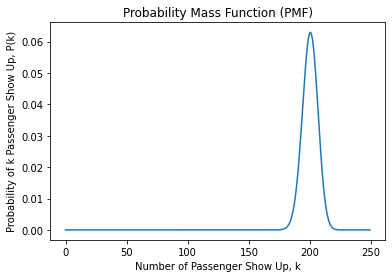

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import binom
n = 250
p = 0.8
k = np.arange(0,n)

P = binom.pmf(k,n,p)

sb.lineplot(x = k,y = P)
plt.xlabel("Number of Passenger Show Up, k")
plt.ylabel("Probability of k Passenger Show Up, P(k)")
plt.title("Probability Mass Function (PMF)")

Scaling the x-axis to compare with the reference plot given.

Text(0.5, 1.0, 'Probability Mass Function (PMF)')

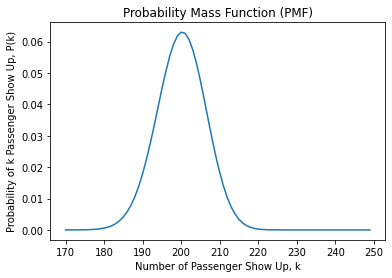

In [2]:
n = 250
p = 0.8
k = np.arange(170,n)

P = binom.pmf(k,n,p)

sb.lineplot(x = k,y = P)
plt.xlabel("Number of Passenger Show Up, k")
plt.ylabel("Probability of k Passenger Show Up, P(k)")
plt.title("Probability Mass Function (PMF)")

---
d)	What is the probability of passengers showed up for:
* i)	200
* ii)	250
---

In [3]:
# For case i: 200 passengers showed up:
result_1 = binom.pmf(k=200,n=250,p=0.8)
print("Probability for case i: "+str(result_1))

# For case ii: 250 passengers showed up:
result_2 = binom.pmf(k=250,n=250,p=0.8)
print("Probability for case ii: "+str(result_2))

Probability for case i: 0.06296802394481274
Probability for case ii: 5.922386521532938e-25


Therefore, the probability for **case i** is about **0.062968**

Therefore, the probability for **case ii** is about **5.9223865e-25**

---
e) What is the expected revenue of 250 tickets sold?

---
The expected revenue is described as the equation below:

$E(x) = \sum{x_{i}P(x_{i})}$

where:

$E(x) = $ the expected revenue

$x_{i} = $ the revenue corresponding to the scenario (how many passengers showed up)

$P(x_{i}) = $ the probability of the scenario (how many passengers showed up)

---
Since 250 tickets are sold up, the expected revenue for the first 200 passengers who showed up are the same \\$30,000 (\\$120 \* 250). ***(Assuming no refund for passengers who did not show up)***

However, the revenue will reduce by \\$300 for each additional passengers who showed up (starting from 201th passenger, inclusive), which could be tabulated as below:

| Passenger      | Revenue, $x_{i}$ (\\$)|
| ----------- | ----------- |
| 0-200th    |  30,000      |
| 201th    |  29,700      |
|  202th  | 29,400      |
|  203th  | 29,100      |
|  ...  | ...    |
|  250th  | 15,000      |

In [4]:
# creating the revenue array
revenue_before_200 = np.full(200,30000) # revenue for 1 to 200 passengers
revenue_after_200 = np.arange(29700,14700,-300) # revenue for 201 to 250 passengers
revenue = np.concatenate([revenue_before_200,revenue_after_200]) # combine both arrays

n = 250
p = 0.8
k = np.arange(0,n)

P = binom.pmf(k,n,p)

# function to calculate the expected revenue
def expected_revenue(revenue, P):
    return sum([r * p for r, p in zip(revenue, P)])

print("Expected Revenue (250 tickets sold): " + str(expected_revenue(revenue,P)))

Expected Revenue (250 tickets sold): 29083.058517360885


Therefore, the expected revenue of 250 ticket sold is **\\$29,083.06**

---

f)	Is 250 overbook tickets the most optimal number? Run a simulation of ***expected revenue*** from 201 to 260 tickets sold.

---



In [5]:
simulated_revenue = []
    
for i in range (201,261):
    # creating the revenue array
    revenue_before_200 = np.full(200,30000) # revenue for 1 to 200 passengers
    revenue_after_200 = np.arange(29700,29700-300*i,-300) # revenue for 201 to 250 passengers
    revenue = np.concatenate([revenue_before_200,revenue_after_200]) # combine both arrays
    
    n = i
    p = 0.8
    k = np.arange(0,n)

    P = binom.pmf(k,n,p)

    # function to calculate the expected revenue
    def expected_revenue(revenue, P):
        return sum([r * p for r, p in zip(revenue, P)])

    print("Expected Revenue (" + str(i) + " tickets sold): " + str(expected_revenue(revenue,P)))
    simulated_revenue = np.append(simulated_revenue, expected_revenue(revenue,P))

Expected Revenue (201 tickets sold): 30000.000000000022
Expected Revenue (202 tickets sold): 30000.00000000002
Expected Revenue (203 tickets sold): 30000.000000000007
Expected Revenue (204 tickets sold): 30000.000000000004
Expected Revenue (205 tickets sold): 29999.999999999985
Expected Revenue (206 tickets sold): 29999.999999999913
Expected Revenue (207 tickets sold): 29999.999999999407
Expected Revenue (208 tickets sold): 29999.99999999663
Expected Revenue (209 tickets sold): 29999.9999999836
Expected Revenue (210 tickets sold): 29999.99999992783
Expected Revenue (211 tickets sold): 29999.999999709642
Expected Revenue (212 tickets sold): 29999.99999892296
Expected Revenue (213 tickets sold): 29999.99999629087
Expected Revenue (214 tickets sold): 29999.999988069932
Expected Revenue (215 tickets sold): 29999.99996397651
Expected Revenue (216 tickets sold): 29999.999897424314
Expected Revenue (217 tickets sold): 29999.999723476303
Expected Revenue (218 tickets sold): 29999.999291778386


---
g) Plot the number of tickets sold against expected revenue and draw a vertical line to mark the optimal number of tickets sold.

---

Optimum Ticket Number Sold: 201.0


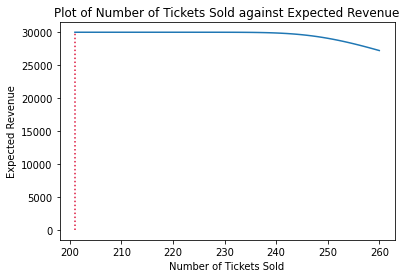

In [6]:
# visualize the simulation result
ticket_sold = np.arange(201,261,1) # number of ticket sold

ax = sb.lineplot(x = ticket_sold,y = simulated_revenue)
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
mode_idx = y.argmax()
ax.vlines(x[mode_idx], 0, y[mode_idx], color='crimson', ls=':')

plt.xlabel("Number of Tickets Sold")
plt.ylabel("Expected Revenue")
plt.title("Plot of Number of Tickets Sold against Expected Revenue")

print("Optimum Ticket Number Sold: " + str(x[mode_idx]))

---
h) By using the optimal number of tickets from (f) and with the shown up rate of 80%, generate 10,000 random numbers to simulate the possible number of passengers that show up . (hint : .rvs(n, p, size=10000))

---

Text(0.5, 1.0, 'Plot of Frequency against Number of Passengers')

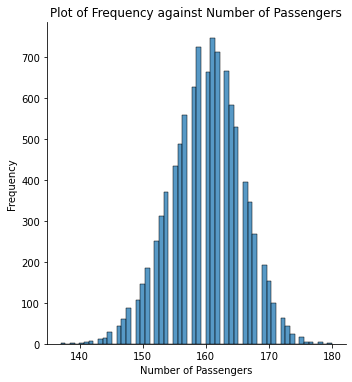

In [7]:
num_passenger = binom.rvs(n = 200,p = 0.8, size = 10000, random_state = 0)
sb.displot(data=num_passenger)

plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.title("Plot of Frequency against Number of Passengers")

---
i) What is the min, max and 95% percentile of the number of passengers showing up from (g)?

---

In [8]:
print("Min:" + str(np.min(num_passenger)))
print("Max:" + str(np.max(num_passenger)))
print("95% percentile:" + str(np.percentile(num_passenger,95)))

Min:137
Max:180
95% percentile:169.0


---
j) What if the passenger isn’t traveling alone, describe how it affects the model.

---